In [1]:
# 코랩에서 실행할 경우 최신 mlxtend 라이브러리를 설치합니다.
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
from IPython.display import Image

In [3]:
Image(url='https://git.io/JL52v', width=500)

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.12.0'

In [6]:
## TF-v1.x 스타일
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a - b) + c

with tf.compat.v1.Session(graph=g) as sess:
    print('결과: z =', sess.run(z))
    print('결과: z =', z.eval())

결과: z = 1
결과: z = 1


In [7]:
## TF v2 스타일
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a - b) + c
tf.print('결과: z =', z)

결과: z = 1


In [8]:
## TF-v1.x 스타일
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a - b) + c

with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('결과: z =', sess.run(z, feed_dict=feed_dict))

결과: z = 1


In [9]:
## TF-v2 스타일
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


In [10]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


In [11]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 1 입력:', compute_z([1, 2], [2, 4], [3, 6]))

랭크 1 입력: [1]
랭크 1 입력: [1 2]


In [12]:
try:
  ## 에러가 발생합니다.
  tf.print('Rank 2 Inputs:', compute_z([[1], [2]], [[2], [4]], [[3], [6]]))
except ValueError:
  print("랭크 에러")

랭크 에러


In [13]:
tf.TensorSpec(shape=[None], dtype=tf.int32)

TensorSpec(shape=(None,), dtype=tf.int32, name=None)

In [14]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [15]:
a.trainable

True

In [16]:
w = tf.Variable([1, 2, 3], trainable=False)
print(w.trainable)

False


In [17]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [18]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()

tf.print(init(shape=(3,)))

[-0.0765984 0.143071353 -0.148470208]


In [19]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[-0.0839093477 0.156726807 -0.162640959]
 [0.611008406 -0.116108358 0.195143715]]


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [20]:
class MyModule(tf.Module):
  def __init__(self):
    init = tf.keras.initializers.GlorotNormal()
    self.w1 = tf.Variable(init(shape=(2, 3)),
                          trainable=True)
    self.w2 = tf.Variable(init(shape=(1, 2)),
                          trainable=False)

In [21]:
m = MyModule()

In [22]:
print('모든 변수: ', [v.shape for v in m.variables])
print('훈련 가능한 변수:   ', [v.shape for v in
                        m.trainable_variables])

모든 변수:  [TensorShape([2, 3]), TensorShape([1, 2])]
훈련 가능한 변수:    [TensorShape([2, 3])]


In [23]:
try:
  ## 이렇게 하면 에러가 발생합니다.
  ## ==> tf.function 데코레이트가 적용된 함수 안에서는
  ##     변수를 만들 수 없습니다.

  @tf.function
  def f(x):
      w = tf.Variable([1, 2, 3])
  f([1])
except ValueError:
  print("Can't declare in @tf.function")

Can't declare in @tf.function


In [24]:
w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):
  return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [25]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

True True


In [26]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw: ', dloss_dw)
print('dL/dw: ', dloss_dw)

dL/dw:  -0.559999764
dL/dw:  tf.Tensor(-0.55999976, shape=(), dtype=float32)


In [27]:
with tf.GradientTape() as tape:
  tape.watch(x)
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.square(y - z)

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx: ', dloss_dx)

dL/dx:  [-0.399999857]


In [28]:
# 계산된 그레이디언트 검증
tf.print(2*w * ((w*x + b) - y))

[-0.399999857]


In [29]:
with tf.GradientTape(persistent=True) as tape:
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw: ', dloss_dw)
tf.print('dL/db: ', dloss_db)

dL/dw:  -0.559999764
dL/db:  -0.399999857


In [30]:
import copy
w_1 = copy.deepcopy(w)
b_1 = copy.deepcopy(b)
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('업데이트전 w:', w_1)
tf.print('업데이트전 b:', b_1)
tf.print('dL/dw: ', dloss_dw)
tf.print('dL/db: ', dloss_db)
tf.print('업데이트된 w:', w)
tf.print('업데이트된 b:', b)
print("학습률: ", (w - w_1) / dloss_dw)
print("학습률: ", (b - b_1) / dloss_db)

업데이트전 w: 1
업데이트전 b: 0.5
dL/dw:  -0.559999764
dL/db:  -0.399999857
업데이트된 w: 1.0056
업데이트된 b: 0.504
학습률:  tf.Tensor(-0.009999961, shape=(), dtype=float32)
학습률:  tf.Tensor(-0.010000024, shape=(), dtype=float32)


In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [32]:
for v in model.variables:
  print(f"{v.name:20s} {v.trainable} {v.shape}")

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


In [33]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16,
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    )
)

model.add(
    tf.keras.layers.Dense(
        units=32,
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    )
)

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
    ]
)

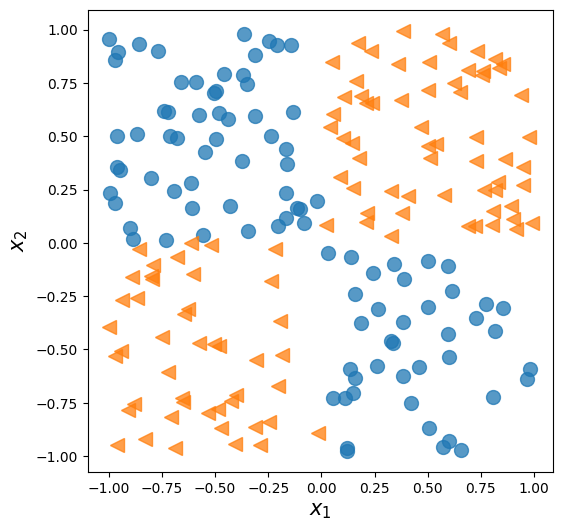

In [35]:
tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
# plt.savefig('images/14_1.png', dpi=300)
plt.show()

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,
                                input_shape=(2, ),
                                activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [38]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

<ipython-input-39-a6e1936df0f5>:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 26s 1ms/step


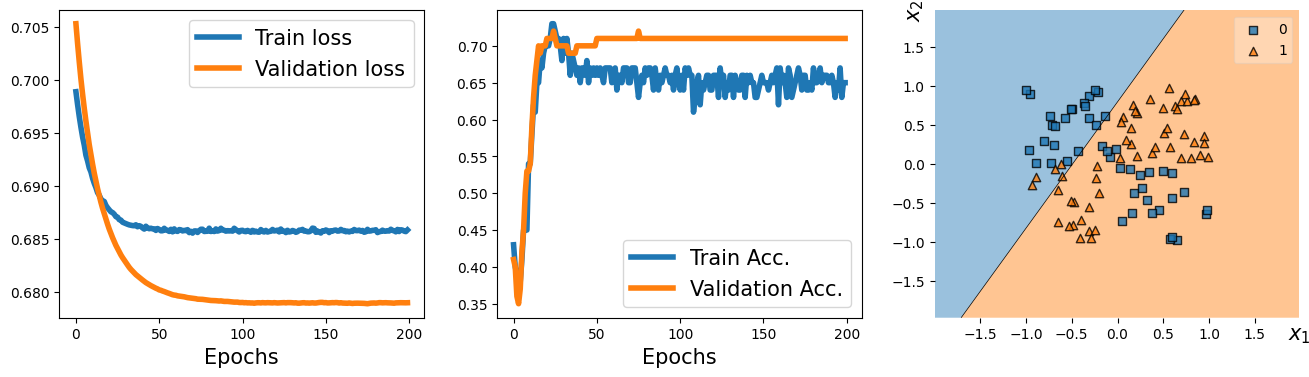

In [39]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_2.png', dpi=300)
plt.show()

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

## 컴파일:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


   39/20000 [..............................] - ETA: 26s  

<ipython-input-41-da2e0ce846ef>:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 27s 1ms/step


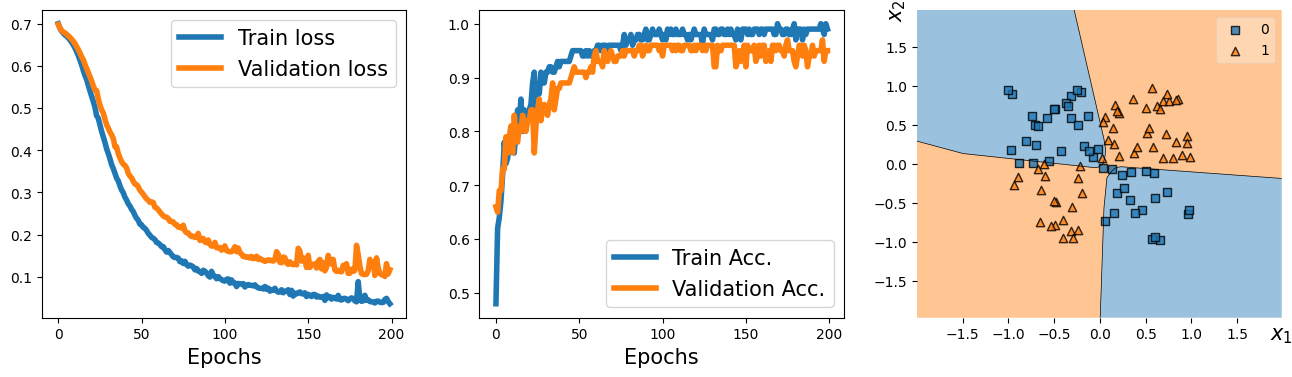

In [41]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_3.png', dpi=300)
plt.show()

In [42]:
## Inputs
inputs = tf.keras.Input(shape=(2,))

## Hidden
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

## Outputs
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## Build the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


<ipython-input-43-b373e0b9ee79>:28: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 39s 2ms/step


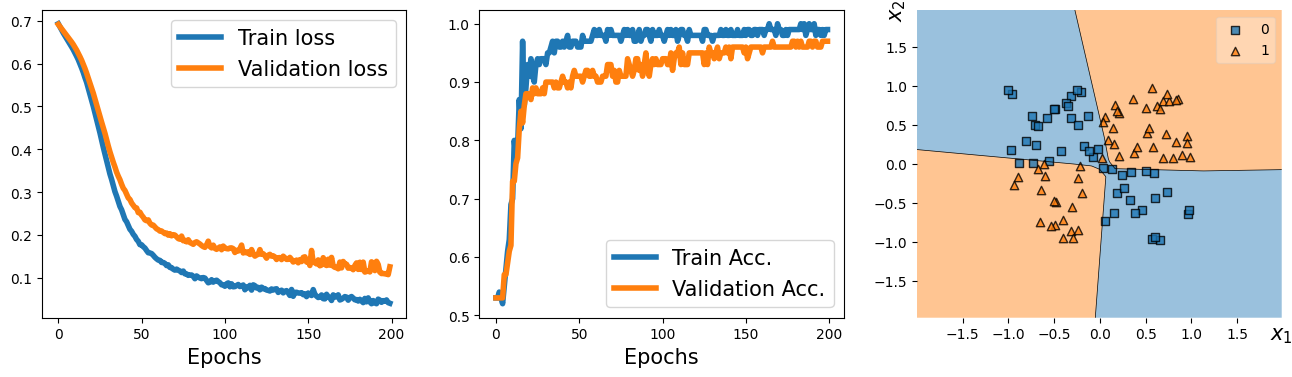

In [43]:
## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  12        
                                                                 
 dense_14 (Dense)            multiple                  20        
                                                                 
 dense_15 (Dense)            multiple                  20        
                                                                 
 dense_16 (Dense)            multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


<ipython-input-44-f4cffd799149>:50: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 39s 2ms/step


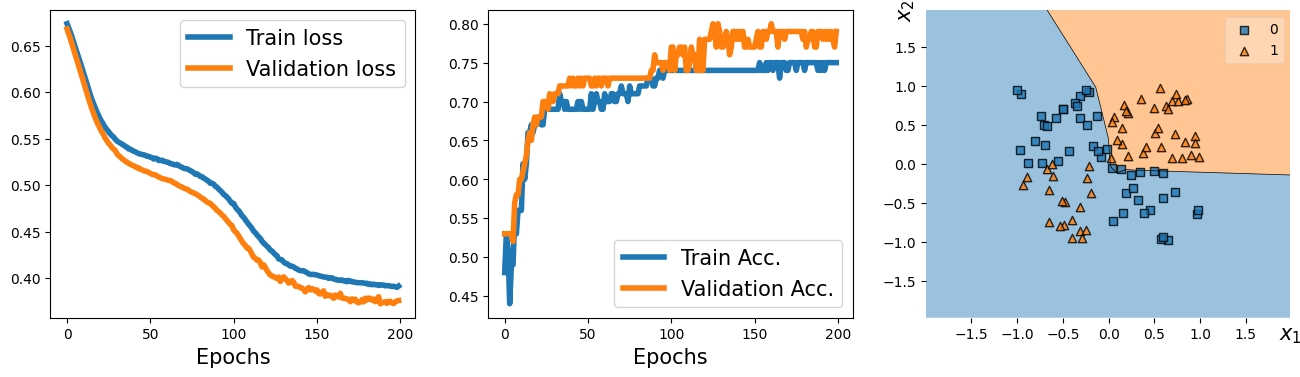

In [44]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

tf.random.set_seed(1)

## 테스트
model = MyModel()
model.build(input_shape=(None, 2))

model.summary()

## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [47]:
class MyCustomStepModel(MyModel):

    def train_step(self, data):
        # fit()에서 전달된 데이터
        x, y = data

        # 그레이디언트 기록 시작
        with tf.GradientTape() as tape:
            # 정방향 계산
            y_pred = self(x)
            # compile() 메서드에서 지정한 손실 계산
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # 훈련가능한 파라미터에 대한 그레이디언트 계산
        # gradients = tape.gradient(loss, self.trainable_variables)
        # 파라미터 업데이트
        # self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # TF 2.4에서는
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)

        # compile() 메서드에서 지정한 지표 계산
        self.compiled_metrics.update_state(y, y_pred)

        # 현재까지 지표와 결괏값을 딕셔너리로 반환
        return {m.name: m.result() for m in self.metrics}

In [48]:
tf.random.set_seed(1)

## 테스트
model = MyCustomStepModel()
model.build(input_shape=(None, 2))

model.summary()

## 컴파일
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

Model: "my_custom_step_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            multiple                  12        
                                                                 
 dense_22 (Dense)            multiple                  20        
                                                                 
 dense_23 (Dense)            multiple                  20        
                                                                 
 dense_24 (Dense)            multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


<ipython-input-50-a8ff388cfe3c>:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 29s 1ms/step


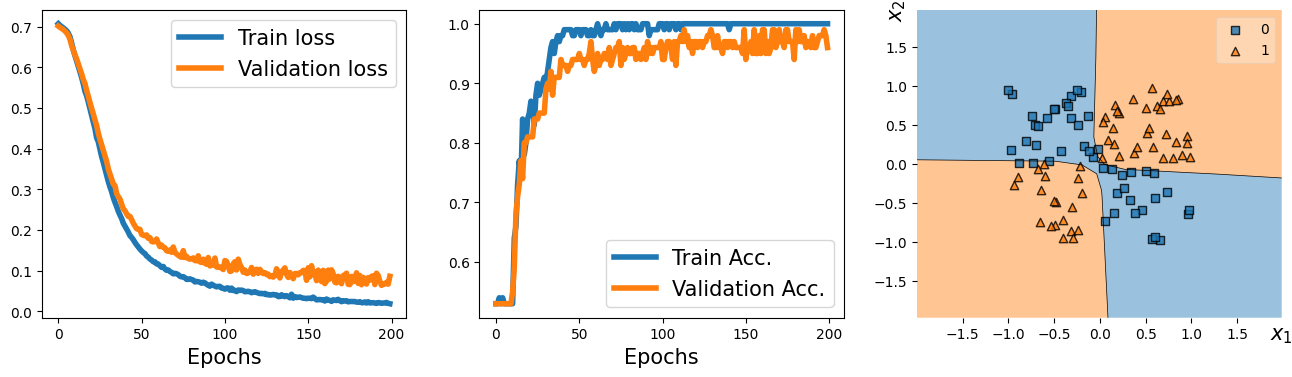

In [50]:
## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['accuracy'], lw=4)
plt.plot(history['val_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [54]:
class NoisyLinear(tf.keras.layers.Layer):
  def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
    self.output_dim = output_dim
    self.noise_stddev = noise_stddev
    super(NoisyLinear, self).__init__(**kwargs)

  def build(self, input_shape):
    self.w = self.add_weight(name='weights',
                             shape=(input_shape[1], self.output_dim),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.output_dim,),
                             initializer='zeros',
                             trainable=True)

  def call(self, inputs, training=False):
    if training:
      batch = tf.shape(inputs)[0]
      dim = tf.shape(inputs)[1]
      noise = tf.random.normal(shape=(batch, dim),
                               mean=0.0,
                               stddev=self.noise_stddev)
      noisy_inputs = tf.add(inputs, noise)
    else:
      noisy_inputs = inputs
    z = tf.matmul(noisy_inputs, self.w) + self.b
    return tf.keras.activations.relu(z)

  def get_config(self):
    config = super(NoisyLinear, self).get_config()
    config.update({'output_dim': self.output_dim,
                   'noise_stddev': self.noise_stddev})
    return config

In [55]:
noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0.00326762861 0.00189998979 0.00794580393 0.00136894151]]
[[5.2137766e-05 0 0 0]]


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_2 (NoisyLinear  (None, 4)                12        
 )                                                               
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
   36/20000 [..............................] - ETA: 29s  

<ipython-input-56-ef1fefa55bce>:40: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 27s 1ms/step


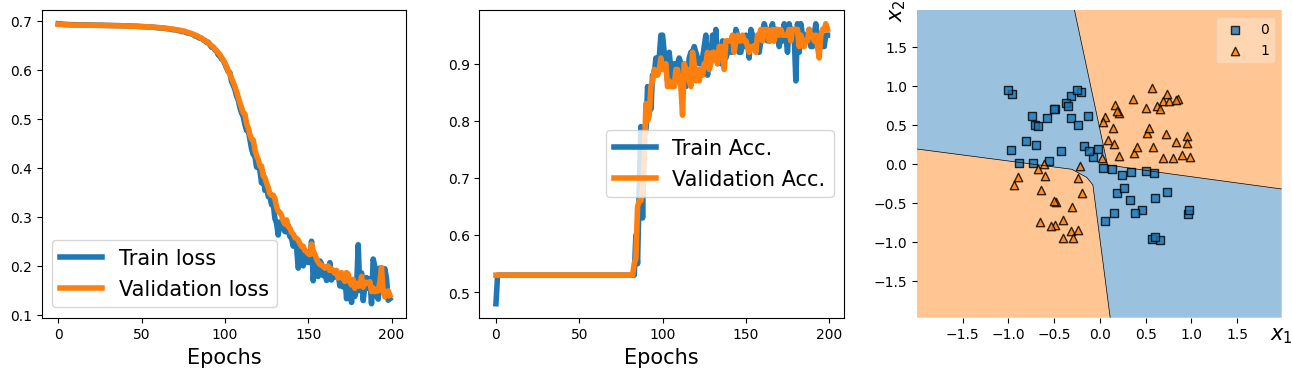

In [56]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.build(input_shape=(None, 2))
model.summary()

## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2,
                 verbose=0)

## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_4.png', dpi=300)
plt.show()